In [1]:
library(MASS)
library(corrplot)
library(boot)
library(leaps)
library(splines)
library(tree)

corrplot 0.92 loaded



In [4]:
roughContact <- read.csv('../../../data/normMar1st.csv', header = TRUE,  sep = ';')

head(roughContact)

,normRSMH,muT,normGamma,normPulloff
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1125200,0.2921840,0.14733700,0.009895030
2,0.1491890,0.8453730,0.09937490,0.000039000
3,0.0602461,0.0167041,0.00110709,0.000132908
4,0.1489480,0.1637390,0.08108370,0.022324100
5,0.0728313,0.1045540,0.02370600,0.000205330
6,0.2266750,0.4659980,0.02289140,0.000154666


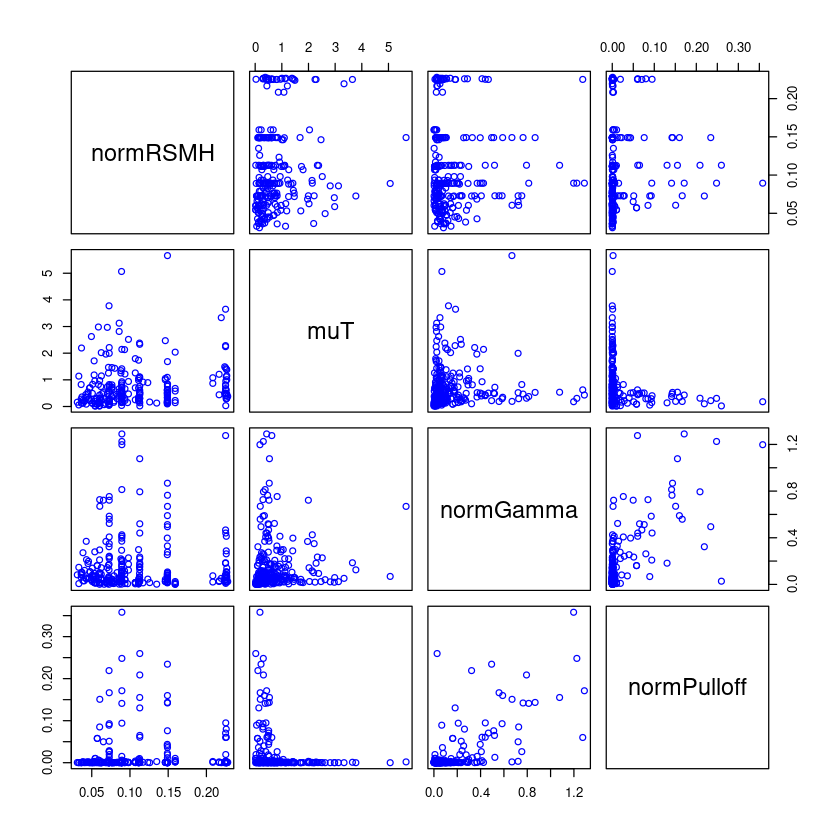

In [7]:
pairs(~ normRSMH + muT + normGamma + normPulloff, data = roughContact, col = 'blue')

In [8]:
summary(roughContact)

    normRSMH            muT           normGamma          normPulloff       
 Min.   :0.03108   Min.   :0.0167   Min.   :0.0002187   Min.   :0.0000030  
 1st Qu.:0.07039   1st Qu.:0.2322   1st Qu.:0.0246765   1st Qu.:0.0002104  
 Median :0.08930   Median :0.4890   Median :0.0671704   Median :0.0006378  
 Mean   :0.10722   Mean   :0.7490   Mean   :0.1593748   Mean   :0.0183963  
 3rd Qu.:0.14883   3rd Qu.:0.9173   3rd Qu.:0.1788320   3rd Qu.:0.0029290  
 Max.   :0.22792   Max.   :5.6600   Max.   :1.2897700   Max.   :0.3579830  

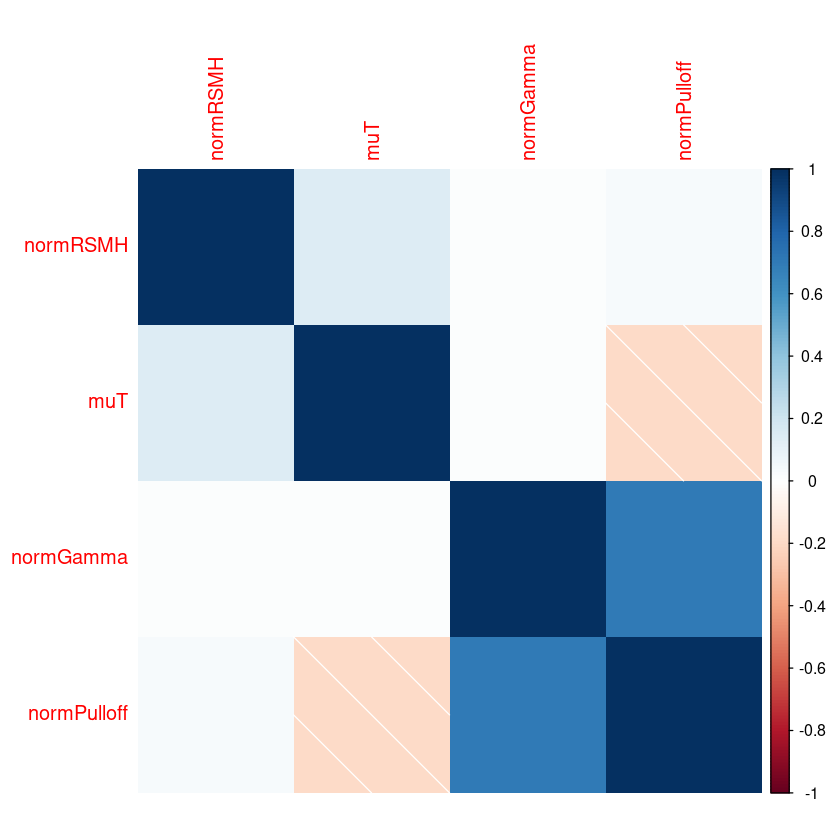

In [9]:
roughContact.cor <- cor(roughContact)

corrplot(roughContact.cor, method='shade')

In [10]:
set.seed(1)

sample <- sample(c(TRUE, FALSE), nrow(roughContact), replace = TRUE, prob = c(0.8, 0.2))
train <- roughContact[sample, ]
test <- roughContact[!sample, ]

In [17]:
lmFit <- lm(normPulloff ~ muT + normGamma, data = train)
summary(lmFit)


Call:
lm(formula = normPulloff ~ muT + normGamma, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.097852 -0.010990 -0.004333  0.002392  0.249924 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.006664   0.003254   2.048   0.0419 *  
muT         -0.012834   0.002703  -4.748 3.88e-06 ***
normGamma    0.124810   0.009900  12.607  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03131 on 203 degrees of freedom
Multiple R-squared:  0.4614,	Adjusted R-squared:  0.4561 
F-statistic: 86.97 on 2 and 203 DF,  p-value: < 2.2e-16


In [21]:
pred <- predict(lmFit, test)

sqrt(mean((test$normPulloff - pred)^2))

[1] 0.04811332

In [22]:
lmFit2 <- lm(normPulloff ~ muT * normGamma, data = train)

summary(lmFit2)


Call:
lm(formula = normPulloff ~ muT * normGamma, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.101489 -0.010723 -0.002763  0.001384  0.254269 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.001478   0.003542   0.417  0.67689    
muT           -0.005037   0.003536  -1.425  0.15579    
normGamma      0.149903   0.012278  12.209  < 2e-16 ***
muT:normGamma -0.035226   0.010629  -3.314  0.00109 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03057 on 202 degrees of freedom
Multiple R-squared:  0.4892,	Adjusted R-squared:  0.4816 
F-statistic: 64.49 on 3 and 202 DF,  p-value: < 2.2e-16


In [23]:
pred <- predict(lmFit2, test)

sqrt(mean((test$normPulloff - pred)^2))

[1] 0.04441355

In [25]:
regFit <- regsubsets(normPulloff ~ ., train)
summary(regFit)

Subset selection object
Call: regsubsets.formula(normPulloff ~ ., train)
3 Variables  (and intercept)
          Forced in Forced out
normRSMH      FALSE      FALSE
muT           FALSE      FALSE
normGamma     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         normRSMH muT normGamma
1  ( 1 ) " "      " " "*"      
2  ( 1 ) " "      "*" "*"      
3  ( 1 ) "*"      "*" "*"      

In [29]:
splineFit <- lm(normPulloff ~ bs(muT * normGamma, df = 1), data = train)
summary(splineFit)

Warning message in bs(muT * normGamma, df = 1):
“'df' was too small; have used 3”



Call:
lm(formula = normPulloff ~ bs(muT * normGamma, df = 1), data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.048321 -0.015018 -0.007640 -0.005179  0.254284 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.005350   0.003710   1.442   0.1509    
bs(muT * normGamma, df = 1)1  0.215180   0.050859   4.231 3.53e-05 ***
bs(muT * normGamma, df = 1)2 -0.466722   0.184250  -2.533   0.0121 *  
bs(muT * normGamma, df = 1)3 -0.002748   0.040958  -0.067   0.9466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04077 on 202 degrees of freedom
Multiple R-squared:  0.09128,	Adjusted R-squared:  0.07779 
F-statistic: 6.764 on 3 and 202 DF,  p-value: 0.0002278


In [31]:
pred <- predict(splineFit, test)

sqrt(mean((test$normPulloff - pred)^2))

[1] 0.07257799